In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

media = [
    'NachDenkSeiten', 
    'taz', 
    'DER SPIEGEL', 
    'ARD', 
    'ZDF', 
    'Bayerischer Rundfunk', 
    'ntv Nachrichten', 
    'faz', 
    'WELT', 
    'BILD', 
    'COMPACTTV'
    ]
parties = [
    'linke',
    'grüne',
    'spd',
    'fdp',
    'cdu',
    'csu',
    'afd'
    ]
btw17 = {
    'linke': 69,
    'grüne': 67,
    'spd': 153,
    'fdp': 80,
    'cdu_csu': 246,
    'afd': 94,
}
btw21 = {
    'linke': 39,
    'grüne': 118,
    'spd': 206,
    'fdp': 92,
    'cdu_csu': 197,
    'afd': 83,
}

In [25]:
def a_pivot_df_medium_vs_party(input_df):
    output_df = pd.pivot_table(input_df, index='medium', columns='party', values='title', aggfunc='count', fill_value=0)
    return output_df

def b_sort_df_by_political_ideology(input_df):
    output_df = input_df.reindex(media)[parties]
    return output_df

def c_standardize_df_by_row_sum(input_df):
    output_df = input_df.div(input_df.sum(axis=1), axis=0)
    return output_df

def d_subtract_df_column_means(input_df):
    output_df = input_df - input_df.mean()
    return output_df
    
def e_heatmap_plot_df(input_df):
    f, ax = plt.subplots(figsize=(9, 8))
    f.subplots_adjust(left=0.15, bottom=.13, right=.99, top=.89)
    sns.heatmap(input_df, annot=True, linewidths=.5, ax=ax, fmt=".1%", center=np.nanmean(input_df), cbar=False, cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed())
    return

def f_saveplot_mentions_short(df, title, path, n_rows_in_title=1):
    from pathlib import Path
    import matplotlib as mpl
    import matplotlib.font_manager as fm
    import matplotlib.pyplot as plt
    mpl.use('pdf')

    fpath = Path(mpl.get_data_path(), "fonts/ttf/cmu_serif_roman.ttf")
    fprop = fm.FontProperties(fname=fpath)

    width = 6.2 #inches
    height = width

    font = {'family':'serif', 'serif': ['cmr10'], 'size':12}
    plt.rc('font',**font)
    plt.rcParams['axes.unicode_minus'] = False
    plt.rc('axes', titlesize=12)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)


    f, ax = plt.subplots(figsize=(9, 8))
    if n_rows_in_title==1:
        f.subplots_adjust(left=0.14, bottom=.15, right=.96, top=.93)
    elif n_rows_in_title==2:
        f.subplots_adjust(left=0.14, bottom=.15, right=.99, top=.88)
    else:
        return
    
    df_to_plot = df.copy()
    sns.heatmap(df_to_plot, annot=True, linewidths=.5, ax=ax, fmt=".1%", center=np.nanmean(df_to_plot), cbar=False, cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed())

    ax.set_xlabel('Party', fontsize=12, font=fpath, color='black')
    ax.set_ylabel('Medium', fontsize=12, font=fpath, color='black')
    ax.set_title(title, fontsize=12, font=fpath, color='black')
    ax.set_xticklabels(['Linke', 'Grüne', 'SPD', 'FDP', 'CDU', 'CSU', 'AfD'], size=12, font=fpath, color='black')
    ax.set_yticklabels(['NDS', 'taz', 'Sp', 'ARD', 'ZDF', 'BR', 'ntv', 'faz', 'WELT', 'BILD', 'CTV'], size=12, font=fpath, color='black')

    f.set_size_inches(width, height*11/21)
    f.savefig(path)
    return

def g_saveplot_mentions_per_seat(df, title, path, n_rows_in_title=1):
    from pathlib import Path
    import matplotlib as mpl
    import matplotlib.font_manager as fm
    import matplotlib.pyplot as plt
    mpl.use('pdf')

    fpath = Path(mpl.get_data_path(), "fonts/ttf/cmu_serif_roman.ttf")
    fprop = fm.FontProperties(fname=fpath)

    width = 6.2 #inches
    height = width

    font = {'family':'serif', 'serif': ['cmr10'], 'size':12}
    plt.rc('font',**font)
    plt.rcParams['axes.unicode_minus'] = False
    plt.rc('axes', titlesize=12)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)


    f, ax = plt.subplots(figsize=(9, 8))
    if n_rows_in_title==1:
        f.subplots_adjust(left=0.14, bottom=.15, right=.96, top=.93)
    elif n_rows_in_title==2:
        f.subplots_adjust(left=0.14, bottom=.15, right=.99, top=.88)
    else:
        return
    
    df_to_plot = df.copy()
    sns.heatmap(df_to_plot, annot=True, linewidths=.5, ax=ax, fmt=".3g", center=np.nanmean(df_to_plot), cbar=False, cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed())

    ax.set_xlabel('Party', fontsize=12, font=fpath, color='black')
    ax.set_ylabel('Medium', fontsize=12, font=fpath, color='black')
    ax.set_title(title, fontsize=12, font=fpath, color='black')
    ax.set_xticklabels(['Linke', 'Grüne', 'SPD', 'FDP', 'CDU/CSU', 'AfD'], size=12, font=fpath, color='black')
    if 'taz' in df_to_plot.index:
        ax.set_yticklabels(['NDS', 'taz', 'Sp', 'ARD', 'ZDF', 'BR', 'ntv', 'faz', 'WELT', 'BILD', 'CTV'], size=12, font=fpath, color='black')
    else:
        ax.set_yticklabels(['NDS', 'Sp', 'ARD', 'ZDF', 'BR', 'ntv', 'faz', 'WELT', 'BILD', 'CTV'], size=12, font=fpath, color='black')
    f.set_size_inches(width, height*11/21)
    f.savefig(path)
    return


In [26]:
party_df = pd.read_pickle('../data/mentions/party_mentions.pkl')
party_df.head()

,medium,id,title,minute,date,search_term,extracted_string,party
0,ARD,Monitor,studioM - Corona-Demos: Alles Verschwörung?,17,2020-05-27,afd,"ist, das zumindest diese Demonstrationen auch ...",afd
1,ARD,Monitor,studioM - Corona-Demos: Alles Verschwörung?,18,2020-05-27,die linke,von der AfD. Es gab eine Demonstration von der...,linke
2,ARD,Monitor,studioM - Corona-Demos: Alles Verschwörung?,18,2020-05-27,afd,beantworten. Da gab es in Zittau eine Demonstr...,afd
3,ARD,Monitor,studioM - Corona-Demos: Alles Verschwörung?,24,2020-05-27,afd,"ich schon für relevant erachte, dass rechtsext...",afd
4,ARD,Monitor,studioM - Corona-Demos: Alles Verschwörung?,31,2020-05-27,afd,"Erzählung, die von der rechten Seite, von PEGI...",afd


In [27]:
party_mentions_by_party_df = a_pivot_df_medium_vs_party(party_df)
party_mentions_by_party_df

party,afd,cdu,csu,fdp,grüne,linke,spd,trump
medium,,,,,,,,
ARD,293,453,138,427,269,59,574,114
BILD,1388,6089,2140,3524,1702,550,5589,3770
Bayerischer Rundfunk,99,81,357,97,123,61,265,153
COMPACTTV,1662,868,276,693,431,271,722,282
DER SPIEGEL,890,1498,764,1021,592,241,1936,699
NachDenkSeiten,572,819,313,350,207,461,1551,476
WELT,1702,9184,3621,6931,3404,1230,9049,4027
ZDF,2510,5030,1576,3938,1880,1114,5016,1838
faz,701,1326,353,799,381,210,1377,1542


In [28]:
party_mentions_2017_by_party_df = a_pivot_df_medium_vs_party(party_df[(party_df.date.dt.year > 2017) & (party_df.date.dt.year < 2021)])
party_mentions_2017_by_party_df

party,afd,cdu,csu,fdp,grüne,linke,spd,trump
medium,,,,,,,,
ARD,110,51,13,31,23,9,49,45
BILD,664,2143,723,1008,286,237,1763,2700
Bayerischer Rundfunk,31,28,152,39,46,27,76,47
COMPACTTV,1157,587,172,475,232,170,441,166
DER SPIEGEL,455,732,430,286,234,100,956,379
NachDenkSeiten,536,649,248,264,146,336,1248,404
WELT,321,1049,427,491,376,148,1076,2863
ZDF,1118,1231,255,701,317,339,1232,1279
faz,486,783,221,362,164,124,802,1280


In [29]:
party_mentions_2021_by_party_df = a_pivot_df_medium_vs_party(party_df[party_df.date.dt.year > 2021])
party_mentions_2021_by_party_df

party,afd,cdu,csu,fdp,grüne,linke,spd,trump
medium,,,,,,,,
ARD,42,122,27,136,62,11,181,37
BILD,119,780,308,946,468,88,1532,241
Bayerischer Rundfunk,2,1,3,3,6,4,4,1
COMPACTTV,11,4,0,6,3,3,6,4
DER SPIEGEL,27,129,64,115,48,19,137,38
NachDenkSeiten,11,24,12,25,15,24,64,2
WELT,885,5433,1907,4429,1935,625,5468,559
ZDF,334,893,282,841,360,193,1132,75
faz,92,219,26,159,88,24,242,42


In [30]:
ordered_party_mentions_2017_by_party_df = b_sort_df_by_political_ideology(party_mentions_2017_by_party_df)
ordered_party_mentions_2021_by_party_df = b_sort_df_by_political_ideology(party_mentions_2021_by_party_df)
ordered_party_mentions_by_party_df = b_sort_df_by_political_ideology(party_mentions_by_party_df)
#export for sentiment analysis
ordered_party_mentions_by_party_df.to_pickle('../data/sentiment/party_mentions.pkl')
ordered_party_mentions_by_party_df

party,linke,grüne,spd,fdp,cdu,csu,afd
medium,,,,,,,
NachDenkSeiten,461,207,1551,350,819,313,572
taz,326,507,688,421,712,113,410
DER SPIEGEL,241,592,1936,1021,1498,764,890
ARD,59,269,574,427,453,138,293
ZDF,1114,1880,5016,3938,5030,1576,2510
Bayerischer Rundfunk,61,123,265,97,81,357,99
ntv Nachrichten,366,729,2041,1175,2097,990,831
faz,210,381,1377,799,1326,353,701
WELT,1230,3404,9049,6931,9184,3621,1702


In [31]:
proportion_party_mentions_2017_by_party_df = c_standardize_df_by_row_sum(ordered_party_mentions_2017_by_party_df)
proportion_party_mentions_2021_by_party_df = c_standardize_df_by_row_sum(ordered_party_mentions_2021_by_party_df)
proportion_party_mentions_by_party_df = c_standardize_df_by_row_sum(ordered_party_mentions_by_party_df)
proportion_party_mentions_by_party_df

party,linke,grüne,spd,fdp,cdu,csu,afd
medium,,,,,,,
NachDenkSeiten,0.107887,0.048444,0.362977,0.081910,0.191669,0.073251,0.133864
taz,0.102613,0.159585,0.216556,0.132515,0.224111,0.035568,0.129053
DER SPIEGEL,0.034716,0.085278,0.278882,0.147076,0.215788,0.110055,0.128205
ARD,0.026661,0.121554,0.259376,0.192951,0.204700,0.062359,0.132399
ZDF,0.052886,0.089252,0.238131,0.186954,0.238796,0.074820,0.119161
Bayerischer Rundfunk,0.056325,0.113573,0.244691,0.089566,0.074792,0.329640,0.091413
ntv Nachrichten,0.044477,0.088589,0.248025,0.142788,0.254830,0.120306,0.100984
faz,0.040800,0.074024,0.267534,0.155236,0.257626,0.068584,0.136196
WELT,0.035022,0.096922,0.257652,0.197346,0.261496,0.103101,0.048461


/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_26765/1951672704.py:18: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()
/Users/hs/miniforge3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  func(*args, **kwargs)
/Users/hs/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


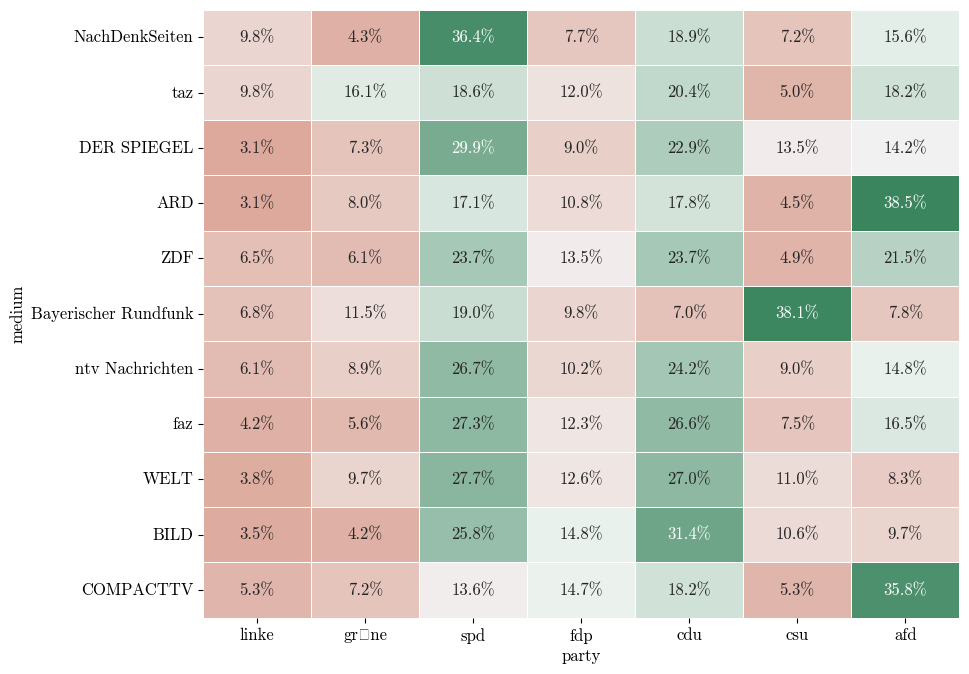

In [32]:
e_heatmap_plot_df(proportion_party_mentions_2017_by_party_df)

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_26765/1951672704.py:18: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))


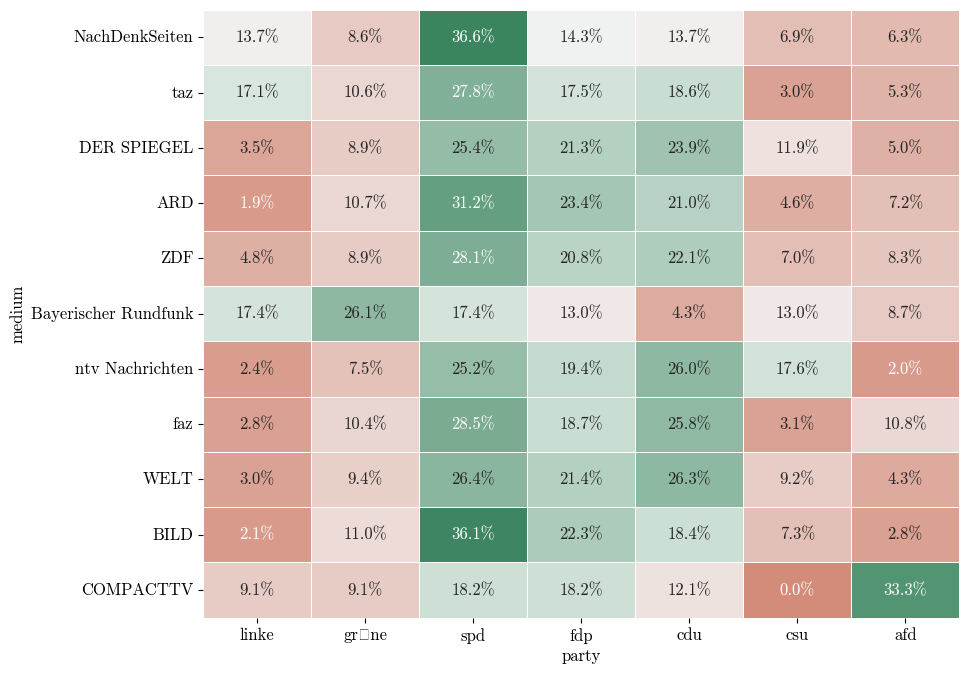

In [33]:
e_heatmap_plot_df(proportion_party_mentions_2021_by_party_df)

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_26765/1951672704.py:18: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))


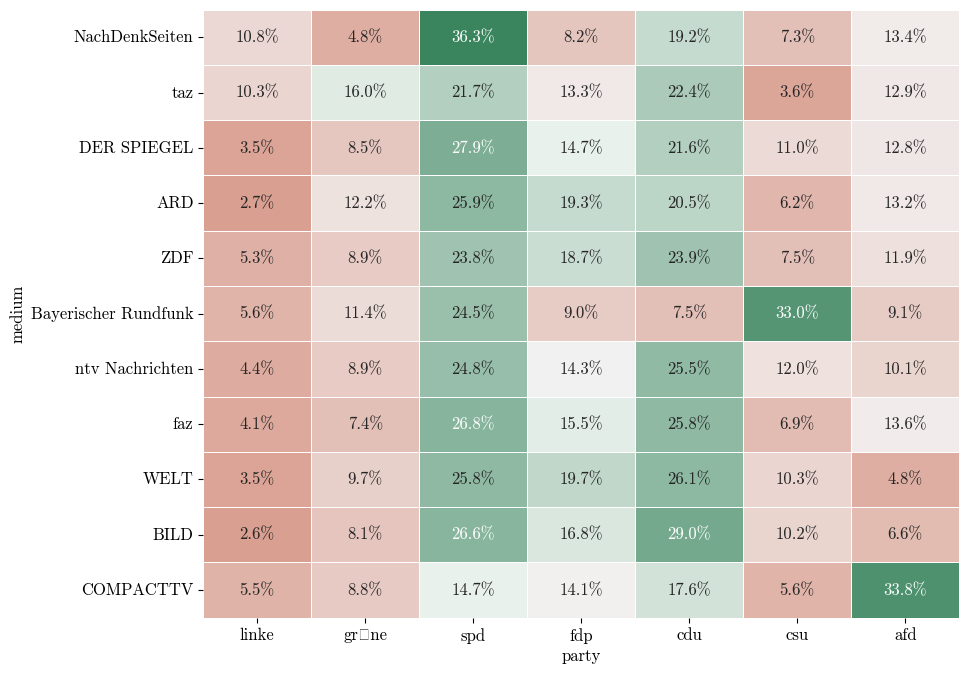

In [34]:
e_heatmap_plot_df(proportion_party_mentions_by_party_df)

In [35]:
deviations_party_mentions_2017_by_party_df = d_subtract_df_column_means(proportion_party_mentions_2017_by_party_df)
deviations_party_mentions_2021_by_party_df = d_subtract_df_column_means(proportion_party_mentions_2021_by_party_df)
deviations_party_mentions_by_party_df = d_subtract_df_column_means(proportion_party_mentions_by_party_df)
deviations_party_mentions_by_party_df

party,linke,grüne,spd,fdp,cdu,csu,afd
medium,,,,,,,
NachDenkSeiten,0.054919,-0.046637,0.109626,-0.066732,-0.025634,-0.029998,0.004456
taz,0.049645,0.064504,-0.036794,-0.016127,0.006809,-0.067681,-0.000355
DER SPIEGEL,-0.018252,-0.009803,0.025532,-0.001566,-0.001514,0.006806,-0.001203
ARD,-0.026307,0.026474,0.006026,0.044309,-0.012603,-0.040890,0.002992
ZDF,-0.000082,-0.005829,-0.015219,0.038312,0.021494,-0.028429,-0.010247
Bayerischer Rundfunk,0.003357,0.018493,-0.008660,-0.059076,-0.142510,0.226391,-0.037995
ntv Nachrichten,-0.008491,-0.006491,-0.005325,-0.005854,0.037528,0.017057,-0.028424
faz,-0.012167,-0.021057,0.014184,0.006594,0.040324,-0.034665,0.006788
WELT,-0.017946,0.001842,0.004302,0.048704,0.044194,-0.000148,-0.080947


/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_26765/1951672704.py:18: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()
/Users/hs/miniforge3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  func(*args, **kwargs)
/Users/hs/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


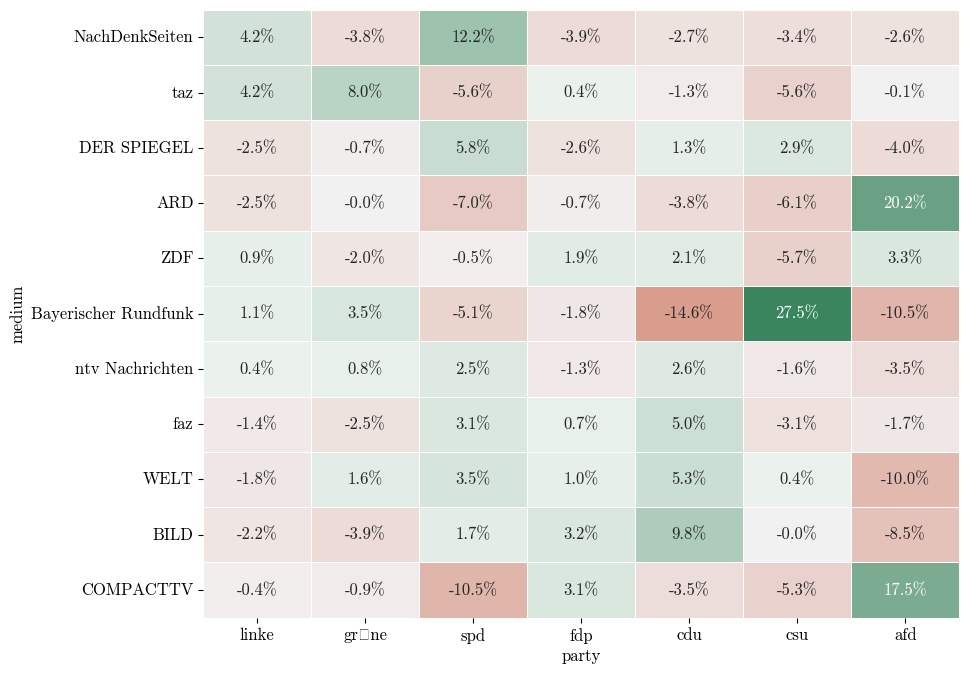

In [36]:
e_heatmap_plot_df(deviations_party_mentions_2017_by_party_df)

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_26765/1951672704.py:18: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))


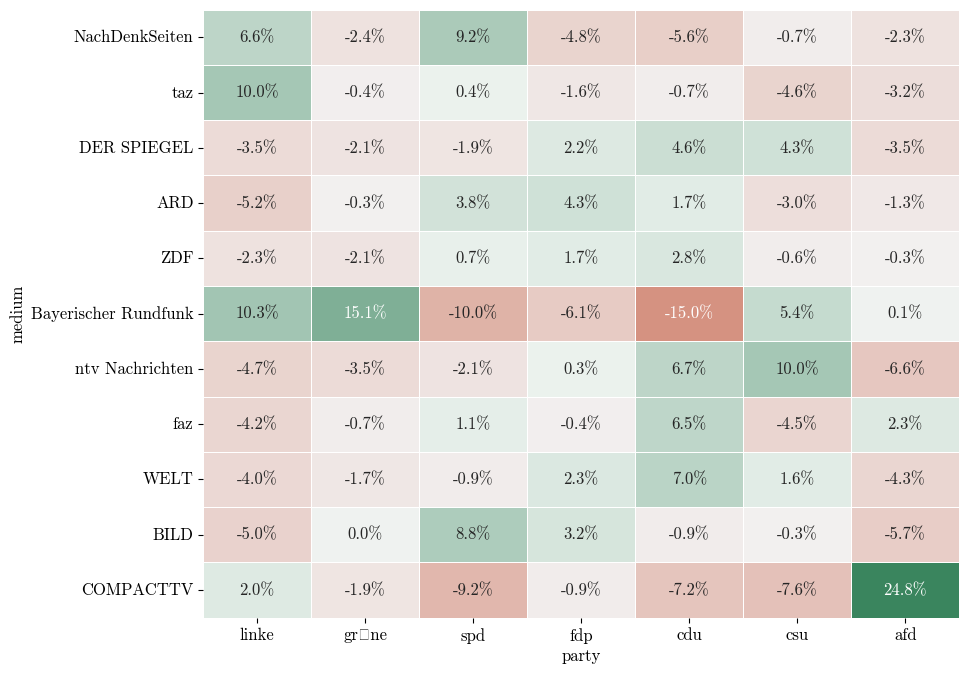

In [37]:
e_heatmap_plot_df(deviations_party_mentions_2021_by_party_df)

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_26765/1951672704.py:18: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))


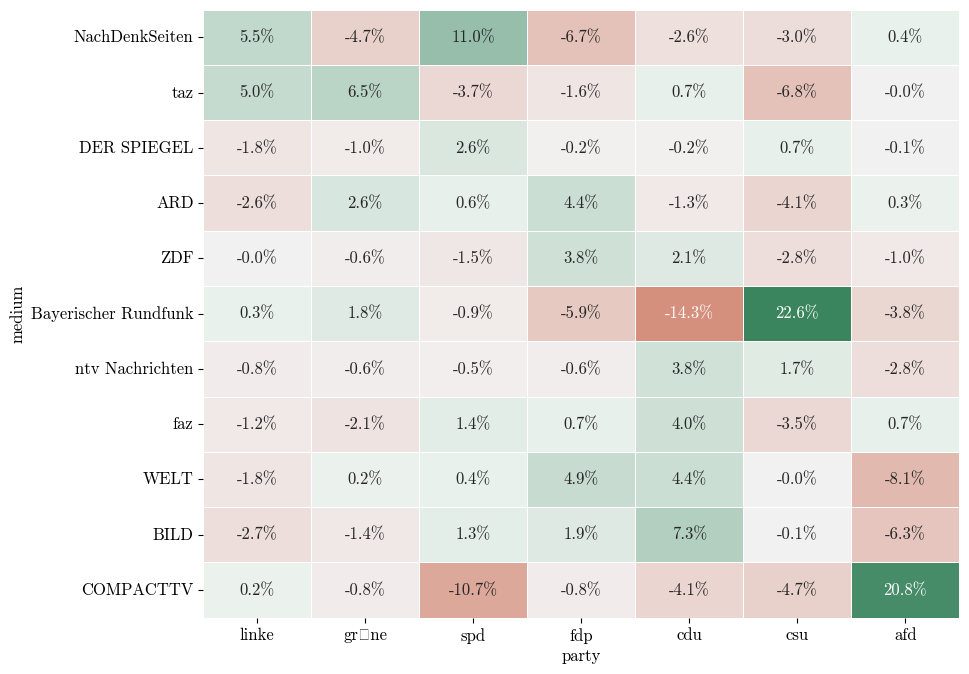

In [38]:
e_heatmap_plot_df(deviations_party_mentions_by_party_df)

In [39]:
f_saveplot_mentions_short(df=proportion_party_mentions_by_party_df, title='Proportion of Party Mentions by Medium', path='../results/englisch/erwähnungen_partei_gekuerzt.pdf')
f_saveplot_mentions_short(df=deviations_party_mentions_by_party_df, title='Proportion of Party Mentions by Medium (zero mean)', path='../results/englisch/erwähnungen_partei_gekuerzt_mittelwertfrei.pdf', n_rows_in_title=1)

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_26765/1951672704.py:44: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_26765/1951672704.py:44: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()


In [40]:
party_mentions_2017 = ordered_party_mentions_2017_by_party_df.copy()

party_mentions_2017['cdu_csu'] = party_mentions_2017['cdu'] + party_mentions_2017['csu']
party_mentions_2017.drop(columns=['cdu', 'csu'], inplace=True)
party_mentions_2017 = party_mentions_2017[['linke', 'grüne', 'spd', 'fdp', 'cdu_csu', 'afd']]

In [41]:
party_mentions_17 = party_mentions_2017.copy()
for party in btw17.keys():
    party_mentions_17[party] /= btw17[party]

party_mentions_17_standardized = party_mentions_17.div(party_mentions_17['afd'], axis=0)

f, ax = plt.subplots(figsize=(9, 8))
f.subplots_adjust(left=0.15, bottom=.13, right=.99, top=.89)
sns.heatmap(party_mentions_17_standardized, annot=True, linewidths=.5, ax=ax, fmt="1.2", center=np.nanmean(party_mentions_17_standardized), cbar=False, cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed())
plt.title('party mentions 2017-2021 pro sitz im bundestag 2017, normiert auf afd')

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_26765/525609079.py:7: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, 'party mentions 2017-2021 pro sitz im bundestag 2017, normiert auf afd')

/Users/hs/miniforge3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  func(*args, **kwargs)


In [42]:
party_mentions_2021 = ordered_party_mentions_2021_by_party_df.copy()

party_mentions_2021['cdu_csu'] = party_mentions_2021['cdu'] + party_mentions_2021['csu']
party_mentions_2021.drop(columns=['cdu', 'csu'], inplace=True)
party_mentions_2021 = party_mentions_2021[['linke', 'grüne', 'spd', 'fdp', 'cdu_csu', 'afd']]

In [43]:
party_mentions_21 = party_mentions_2021.copy()
for party in btw21.keys():
    party_mentions_21[party] /= btw21[party]

party_mentions_21_standardized = party_mentions_21.div(party_mentions_21['afd'], axis=0)

f, ax = plt.subplots(figsize=(9, 8))
f.subplots_adjust(left=0.15, bottom=.13, right=.99, top=.89)
sns.heatmap(party_mentions_21_standardized, annot=True, linewidths=.5, ax=ax, fmt="1.2", center=np.nanmean(party_mentions_21_standardized), cbar=False, cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed())
plt.title('party mentions seit 2021 pro sitz im bundestag 2021, normiert auf afd')

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_26765/1350381734.py:7: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, 'party mentions seit 2021 pro sitz im bundestag 2021, normiert auf afd')

/Users/hs/miniforge3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  func(*args, **kwargs)


In [44]:
g_saveplot_mentions_per_seat(df=party_mentions_17_standardized, title='Party Mentions Per Bundestag Seat 2017, Normalized', path='../results/englisch/erwähnungen_partei_gekuerzt_pro_sitz_2017.pdf')
g_saveplot_mentions_per_seat(df=party_mentions_21_standardized, title='Party Mentions Per Bundestag Seat 2021, Normalized', path='../results/englisch/erwähnungen_partei_gekuerzt_pro_sitz_2021.pdf')

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_26765/1951672704.py:86: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_26765/1951672704.py:86: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()


In [45]:
party_mentions_17_standardized.drop(['NachDenkSeiten', 'Bayerischer Rundfunk', 'COMPACTTV']).mean().plot()
party_mentions_21_standardized.drop(['NachDenkSeiten', 'Bayerischer Rundfunk', 'COMPACTTV']).mean().plot()
plt.title('blau 2017, orange 2021')
print('durchschnitt aller medien (ausgenommen extreme), party mentions pro sitz im bundestag, standardisiert auf afd')

durchschnitt aller medien (ausgenommen extreme), party mentions pro sitz im bundestag, standardisiert auf afd


In [46]:
party_lineplot_df = pd.DataFrame()
party_lineplot_df['2017'] = party_mentions_17_standardized.drop(['NachDenkSeiten', 'Bayerischer Rundfunk', 'COMPACTTV']).mean()
party_lineplot_df['2021'] = party_mentions_21_standardized.drop(['NachDenkSeiten', 'Bayerischer Rundfunk', 'COMPACTTV']).mean()
party_lineplot_df = party_lineplot_df.T
party_lineplot_df['year'] = party_lineplot_df.index
party_lineplot_df = pd.melt(party_lineplot_df, id_vars=['year'], value_vars=['linke', 'grüne', 'spd', 'fdp', 'cdu_csu', 'afd'])
party_lineplot_df.columns = ['Year', 'party', 'value']
party_lineplot_df.to_pickle('../data/mentions/lineplot_party.pkl')